In [2]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%cd /home/bea/ptg/object-states

/home/bea/ptg/object-states


In [4]:
fs=glob('plots7*')+glob('plots8*')
fs=glob('plots/*')
fs

['plots/clip', 'plots/val_mit', 'plots/val_nyu']

In [5]:
df = pd.concat([
    pd.read_csv(f).assign(key=d.split('-',1)[1], object=f.split('/')[-2])
    for d in fs
    for f in glob(f'{d}/clip/*/metrics.csv')
])
df = df[df.model_name == 'knn11']
df.head()

IndexError: list index out of range

In [ ]:
df[['key', 'model_name']].value_counts()

key                  model_name
mit-aug              knn11         13
mit-noaug            knn11         13
nyu-aug              knn11         13
nyu-aug-fullvocab    knn11         13
nyu-aug-supersimple  knn11         13
nyu-noaug            knn11         13
mit-aug-fullvocab    knn11          7
mit-aug-supersimple  knn11          7
nyu-ssimple-smooth   knn11          7
Name: count, dtype: int64

In [6]:
for obj, odf in df.groupby('object'):
    plt.figure(figsize=(15, 4))
    plt.title(obj)
    for k, kdf in odf.groupby('key'):
        # https://matplotlib.org/stable/api/markers_api.html
        # https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
        plt.plot(
            kdf.n_videos, kdf.f1, 
            c=('g' if '-fullvocab' in k else 'r' if '-supersimple' in k else 'b'),
            marker=('^' if '-aug' in k else '.'), 
            linestyle=(':' if 'nyu' in k else '-'),
            label=k)
    plt.legend()

NameError: name 'df' is not defined

In [25]:
dfi = df[
    (df.object == 'tortilla') & 
    (df.key == 'nyu-ssimple-smooth')
]
dfi

,Unnamed: 0,accuracy,f1,ap,avg_recal,model_name,n_videos,n_neighbors,run_name,key,object
0,0,0.235654,0.309930,0.213853,0.323073,knn11,1,11.0,clip_knn11_1vid_movingavg-16,nyu-ssimple-smooth,tortilla
1,1,0.719618,0.604387,0.628097,0.584003,knn11,2,11.0,clip_knn11_2vid_movingavg-16,nyu-ssimple-smooth,tortilla
2,2,0.733553,0.631620,0.655337,0.606039,knn11,3,11.0,clip_knn11_3vid_movingavg-16,nyu-ssimple-smooth,tortilla
3,3,0.750365,0.608692,0.662207,0.589786,knn11,4,11.0,clip_knn11_4vid_movingavg-16,nyu-ssimple-smooth,tortilla
4,4,0.750365,0.608692,0.662207,0.589786,knn11,5,11.0,clip_knn11_5vid_movingavg-16,nyu-ssimple-smooth,tortilla
5,5,0.756670,0.621942,0.669553,0.601468,knn11,6,11.0,clip_knn11_6vid_movingavg-16,nyu-ssimple-smooth,tortilla
6,6,0.757219,0.621176,0.662010,0.602787,knn11,7,11.0,clip_knn11_7vid_movingavg-16,nyu-ssimple-smooth,tortilla


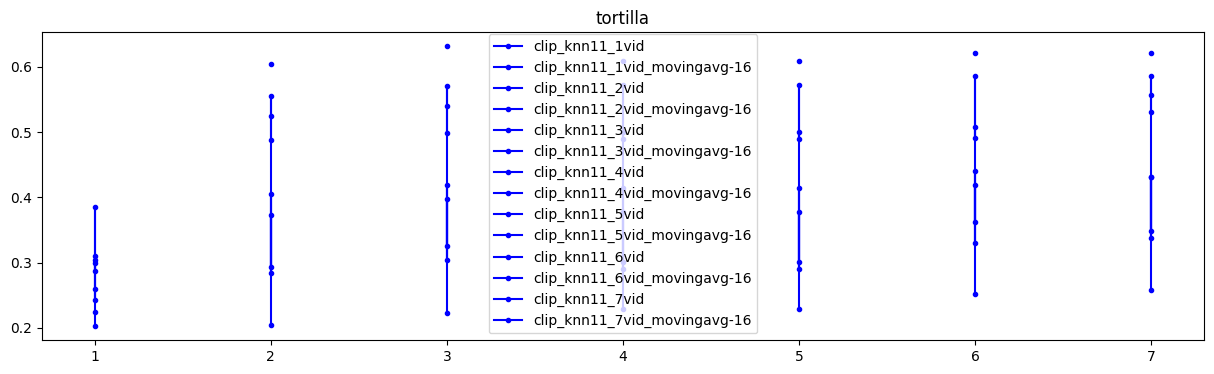

In [26]:

    plt.figure(figsize=(15, 4))
    plt.title(obj)
    for k, kdf in odf.groupby('run_name'):
        # https://matplotlib.org/stable/api/markers_api.html
        # https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
        plt.plot(
            kdf.n_videos, kdf.f1, 
            c=('g' if '-fullvocab' in k else 'r' if '-supersimple' in k else 'b'),
            marker=('^' if '-aug' in k else '.'), 
            linestyle=(':' if 'nyu' in k else '-'),
            label=k)
    plt.legend()